# Task 8.2. Other morphological operations
---
***Author: Piotr Skalski***

## 1. Imports

In [3]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm
from skimage.morphology import reconstruction

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [4]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "text.bmp"

## 3. Loading images

In [5]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

### 3.1 Data overview

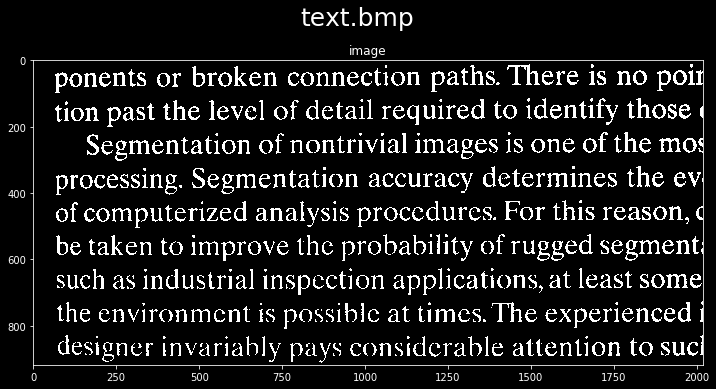

In [6]:
display_util.image(image, "text.bmp", size=(12,6))

## 4. Reconstruction

### 4.1. Local settings

In [7]:
KERNEL_SHAPE = (1, 51)
IMAGE = np.copy(image)

### 4.2. Use of the built-in morphology.reconstruction function - the equivalent of matlab imreconstruct

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_open = cv2.morphologyEx(IMAGE, cv2.MORPH_OPEN, kernel)

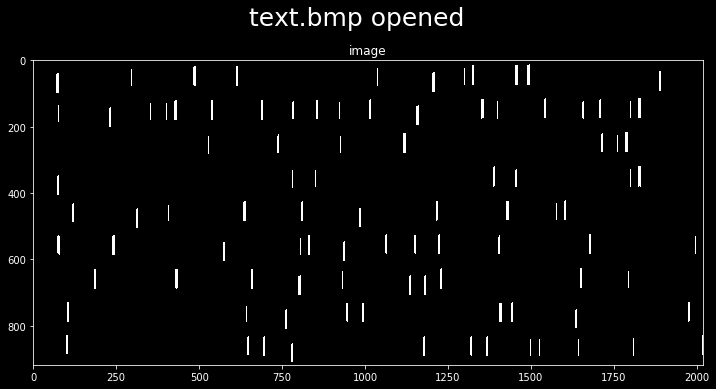

In [9]:
display_util.image(image_open, "text.bmp opened", size=(12,6))

In [10]:
selem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
image_reconstructed = reconstruction(image_open, IMAGE, method='dilation', selem=selem)

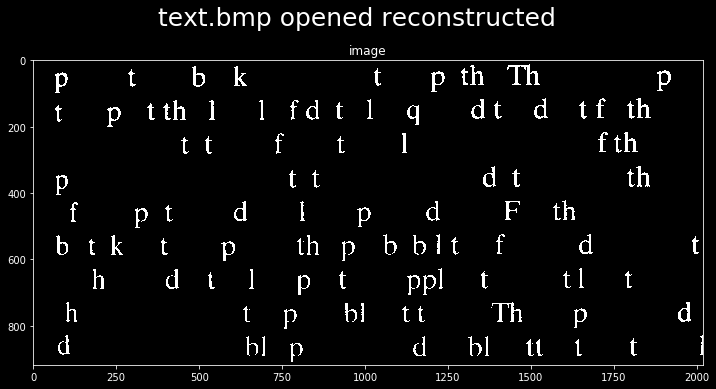

In [11]:
display_util.image(image_reconstructed, "text.bmp opened reconstructed", size=(12,6))

## 5. Filling holes

### 5.1. Local settings

In [12]:
IMAGE = np.copy(image)

### 5.2. Implementation

In [13]:
# Copy the thresholded image.
image_copy = np.copy(IMAGE)
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = IMAGE.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(image_copy, mask, (0,0), 255);
 
# Invert floodfilled image
image_copy_inv = cv2.bitwise_not(image_copy)
 
# Combine the two images to get the foreground.
image_filled = IMAGE | image_copy_inv

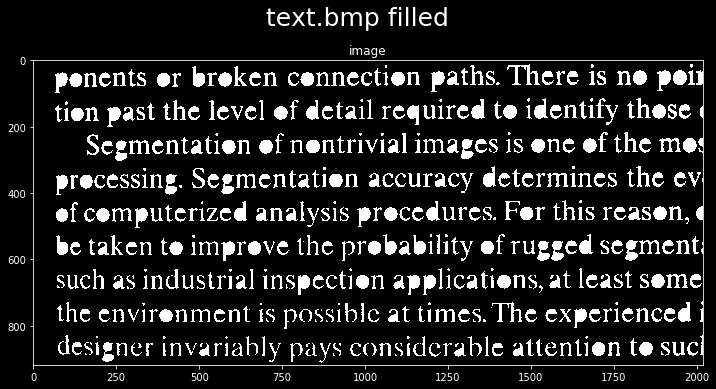

In [14]:
display_util.image(image_filled, "text.bmp filled", size=(12,6))

## 6. Clearing borders

### 6.1. Local settings

In [15]:
IMAGE = np.copy(image)

### 6.2. Implementation of imclearborder polyfill

In [25]:
def imclearborder(imgBW, radius):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    im, contours, hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    (imgRows, imgCols) = imgBW.shape; 

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

In [26]:
image_clearborder = imclearborder(IMAGE, 1)

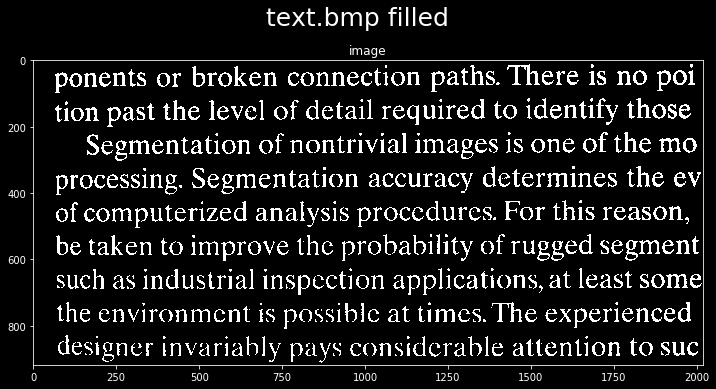

In [27]:
display_util.image(image_clearborder , "text.bmp filled", size=(12,6))